In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
import os
os.getcwd()

'C:\\Users\\jatin\\Desktop\\CAL AI&ML\\capstone\\historical\\Capstone 2\\Part 1'

In [3]:
import tarfile
dataset = tarfile.open("datanew.tar")


In [4]:
import pandas as pd
df = pd.DataFrame(columns=['class','dir','image_file'])
df

Empty DataFrame
Columns: [class, dir, image_file]
Index: []

In [5]:
train_dir = r"C:\Users\jatin\Desktop\CAL AI&ML\capstone\historical\Capstone 2\Part 1\datanew\dataset_hist_structures\Stuctures_Dataset"
test_dir = r"C:\Users\jatin\Desktop\CAL AI&ML\capstone\historical\Capstone 2\Part 1\datanew\dataset_hist_structures\Dataset_test\Dataset_test_original_1478"

In [6]:
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith('.jpg'):
            im_class = os.path.basename(root)
            image_path = os.path.join(root, file)
            df.loc[df.shape[0]] = [im_class, root, image_path]


In [7]:
print('Total images: ', df.shape[0])
df.head()

Total images:  10543


class                                                dir  \
0  altar  C:\Users\jatin\Desktop\CAL AI&ML\capstone\hist...   
1  altar  C:\Users\jatin\Desktop\CAL AI&ML\capstone\hist...   
2  altar  C:\Users\jatin\Desktop\CAL AI&ML\capstone\hist...   
3  altar  C:\Users\jatin\Desktop\CAL AI&ML\capstone\hist...   
4  altar  C:\Users\jatin\Desktop\CAL AI&ML\capstone\hist...   

                                          image_file  
0  C:\Users\jatin\Desktop\CAL AI&ML\capstone\hist...  
1  C:\Users\jatin\Desktop\CAL AI&ML\capstone\hist...  
2  C:\Users\jatin\Desktop\CAL AI&ML\capstone\hist...  
3  C:\Users\jatin\Desktop\CAL AI&ML\capstone\hist...  
4  C:\Users\jatin\Desktop\CAL AI&ML\capstone\hist...

In [8]:
print(df.groupby(['class']).size())

class
altar               829
apse                514
bell_tower         1059
column             1919
dome(inner)         616
dome(outer)        1177
flying_buttress     407
gargoyle           1571
portal              308
stained_glass      1033
vault              1110
dtype: int64


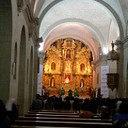

In [9]:
img_file= r"C:\Users\jatin\Desktop\CAL AI&ML\capstone\historical\Capstone 2\Part 1\datanew\dataset_hist_structures\Stuctures_Dataset\altar\16423588_e93cab4efa_m.jpg"

altar_1=tf.keras.preprocessing.image.load_img(img_file)
altar_1

In [10]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 100)

In [11]:
type(altar_1)

PIL.JpegImagePlugin.JpegImageFile

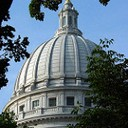

In [12]:
dome_outer_1=tf.keras.preprocessing.image.load_img(r"C:\Users\jatin\Desktop\CAL AI&ML\capstone\historical\Capstone 2\Part 1\data\datanew\dataset_hist_structures\Stuctures_Dataset\dome(outer)\2674640_7bf87943fb_m.jpg")
dome_outer_1

In [13]:
altar_1.size

(128, 128)

In [14]:
dome_outer_1.size

(128, 128)

In [15]:
images_per_category = 8
categories = os.listdir(train_dir)
print(categories)

class_names=categories

['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'portal', 'stained_glass', 'vault']


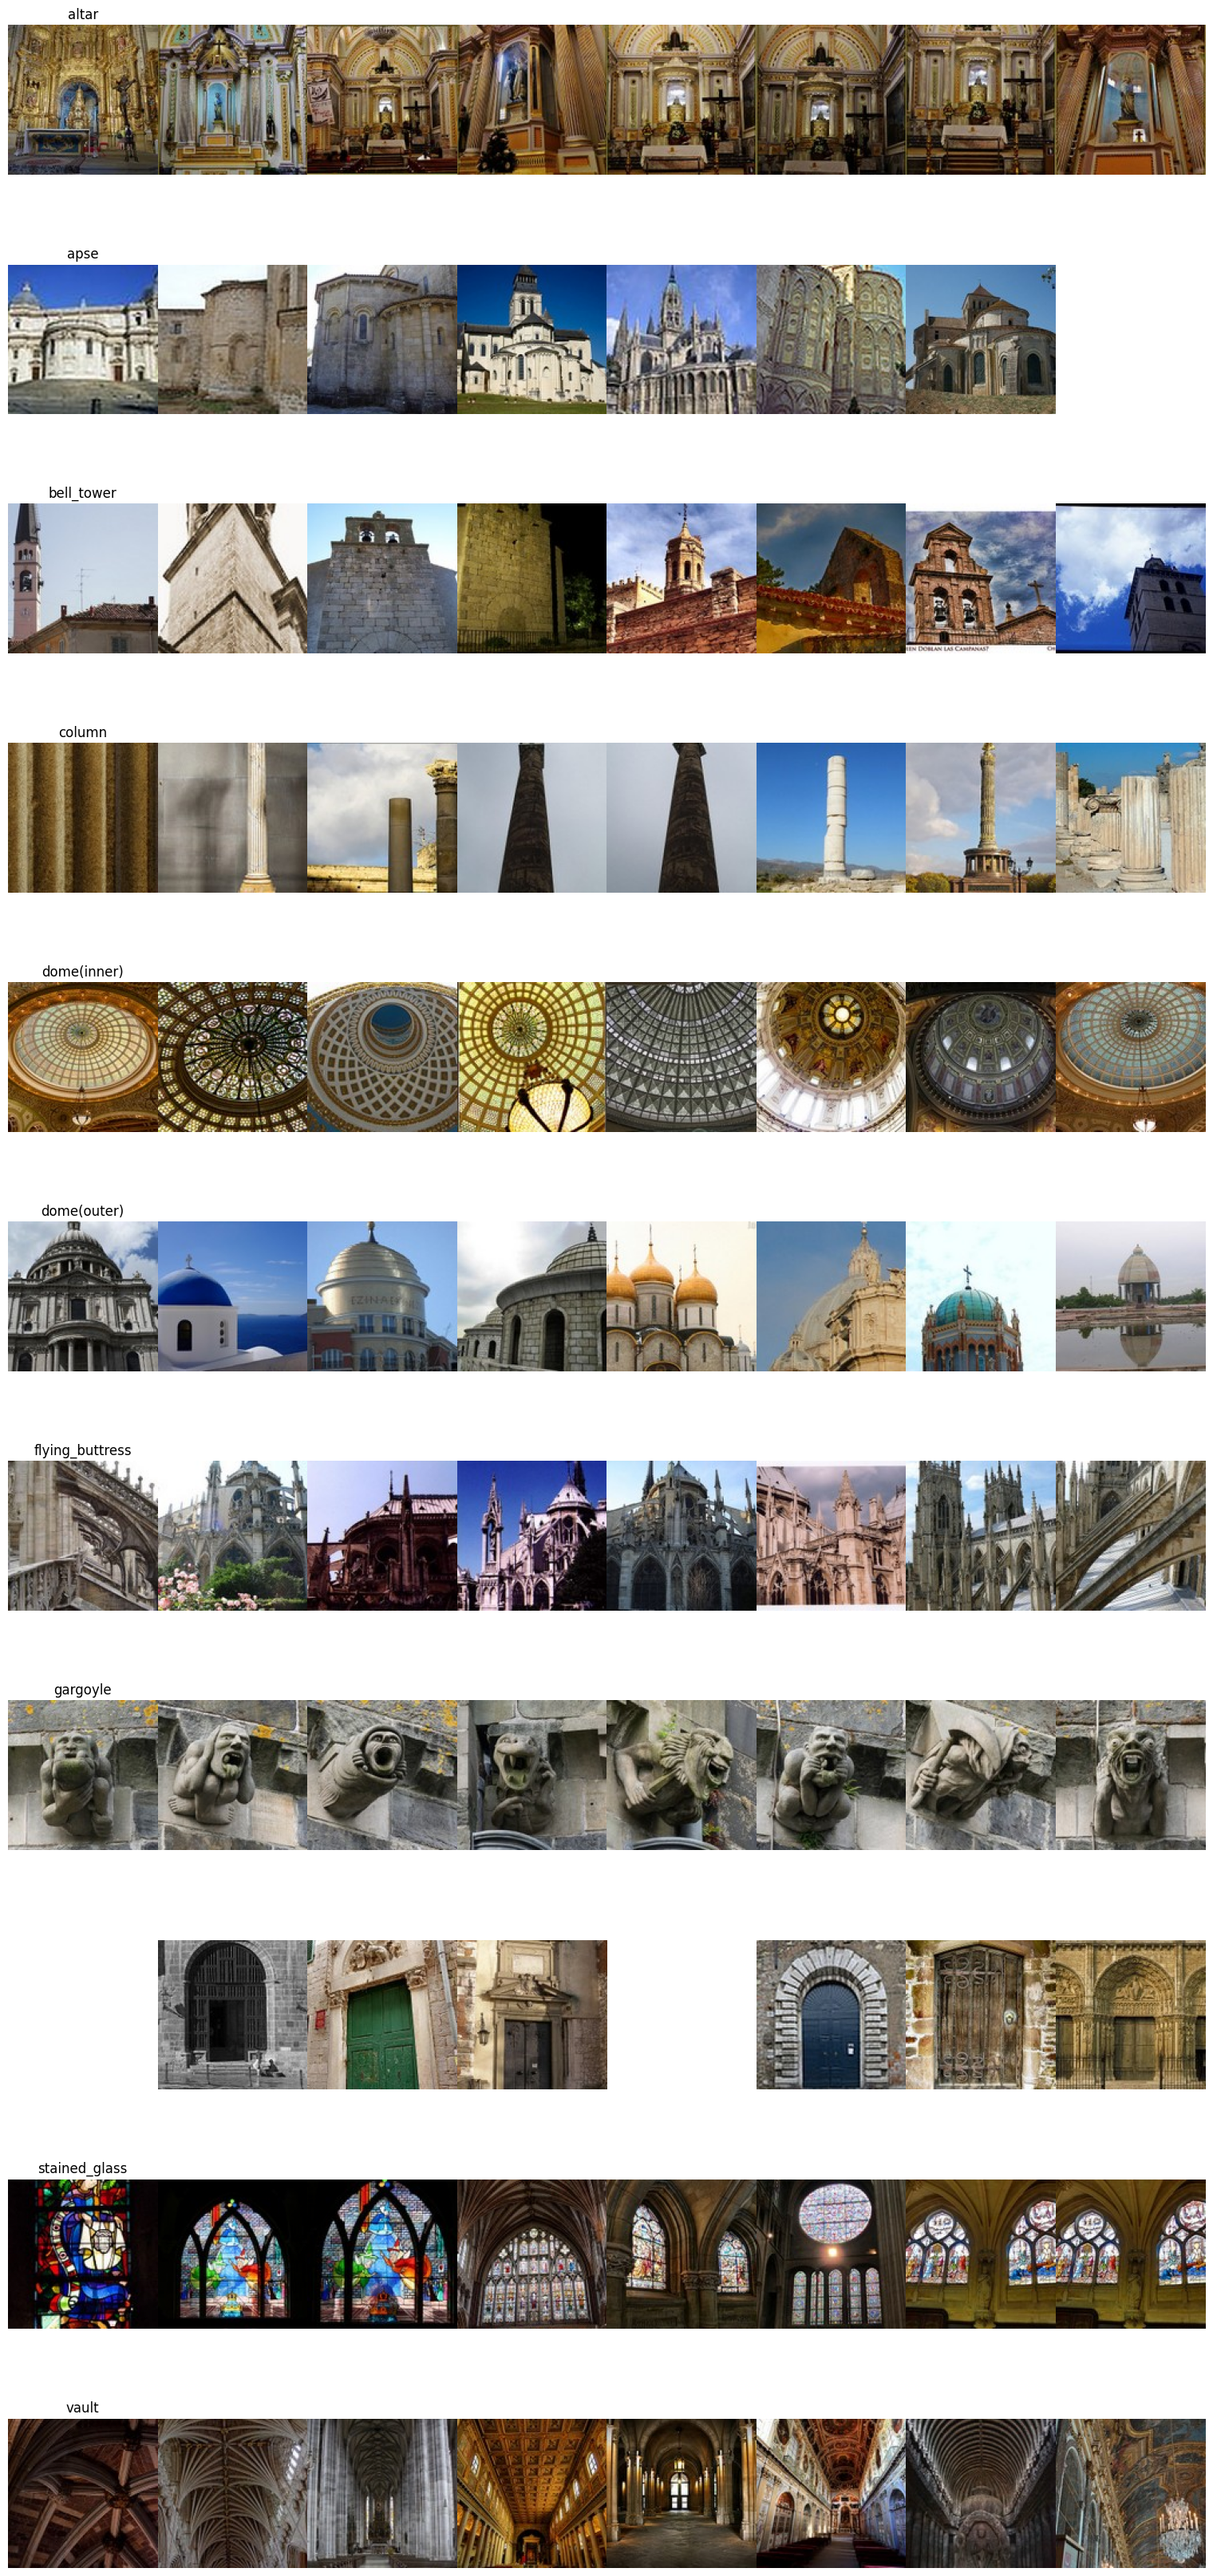

In [16]:
fig, axes = plt.subplots(nrows=len(categories), ncols=images_per_category, figsize=(15, len(categories)*3))
for i, category in enumerate(categories):
    category_path = os.path.join(train_dir, category)
    
    if os.path.isdir(category_path):  
        image_files = [f for f in os.listdir(category_path) if f.endswith('.jpg')]
        
        for j, image_file in enumerate(image_files[:images_per_category]):
            image_path = os.path.join(category_path, image_file)
            img = cv2.imread(image_path)
            if img is None:
                continue

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax = axes[i, j] if len(categories) > 1 else axes[j]
            ax.imshow(img_rgb)
            ax.axis('off')  
            if j == 0:
                ax.set_title(category)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0)
for ax in axes.flatten():
    ax.set_frame_on(False)  
    ax.set_xticks([]) 
    ax.set_yticks([]) 

plt.show()

In [17]:
img_height, img_width = 128, 128
batch_size = 32
img_size = 128
img_depth = 3

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
r'C:\Users\jatin\Desktop\CAL AI&ML\capstone\historical\Capstone 2\Part 1\datanew\dataset_hist_structures\Stuctures_Dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    r'C:\Users\jatin\Desktop\CAL AI&ML\capstone\historical\Capstone 2\Part 1\datanew\dataset_hist_structures\Stuctures_Dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 8440 images belonging to 11 classes.
Found 2103 images belonging to 11 classes.


In [19]:
batch_size = 32
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, img_depth))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x) 
x = Dense(1024, activation='relu')(x)
x = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [20]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    batch_size=batch_size
)


C:\Users\jatin\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 1146s 4s/step - accuracy: 0.5668 - loss: 1.6642 - val_accuracy: 0.1113 - val_loss: 2.5833
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 1074s 4s/step - accuracy: 0.8001 - loss: 0.6716 - val_accuracy: 0.1826 - val_loss: 4.1137
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 1073s 4s/step - accuracy: 0.8248 - loss: 0.5843 - val_accuracy: 0.4593 - val_loss: 2.0439
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 1072s 4s/step - accuracy: 0.8540 - loss: 0.4646 - val_accuracy: 0.6629 - val_loss: 1.1958
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 1068s 4s/step - accuracy: 0.8566 - loss: 0.4625 - val_accuracy: 0.7874 - val_loss: 0.6781
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 1070s 4s/step - accuracy: 0.8664 - loss: 0.4242 - val_accuracy: 0.4660 - val_loss: 1.8766
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 1077s 4s/step - accuracy: 0.8758 - loss: 0.3979 - val_accuracy: 0.7646 - val_loss: 0.8482
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 1073s 4s/step - accuracy: 0.8750 - loss: 0.4069 - 

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageFile
import os

ImageFile.LOAD_TRUNCATED_IMAGES = True

def safe_load_image(filepath):
    try:
        img = Image.open(filepath)  
        img.verify()               
        return True                
    except (OSError, IOError):
        print(f"Skipping corrupted image: {filepath}")
        return False              


def clean_dataset(dataset_path):
    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            if not safe_load_image(file_path):
                os.remove(file_path)  
                print(f"Removed: {file_path}")


test_data_path = r"C:\Users\jatin\Desktop\CAL AI&ML\capstone\historical\Capstone 2\Part 1\datanew\dataset_hist_structures\Dataset_test\Dataset_test_original_1478"
clean_dataset(test_data_path)
datagen = ImageDataGenerator(rescale=1.0/255)

In [22]:
test_data = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    r"C:\Users\jatin\Desktop\CAL AI&ML\capstone\historical\Capstone 2\Part 1\datanew\dataset_hist_structures\Dataset_test\Dataset_test_original_1478",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1610 images belonging to 11 classes.


In [23]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.2f}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 594ms/step - accuracy: 0.7472 - loss: 0.8733
Test accuracy: 0.75


In [24]:
model.save('models/historical_structure_classi.h5')

In [25]:
class EarlyStoppingAtAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy=0.90):
        super(EarlyStoppingAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy 
        

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get("val_accuracy")
        if val_accuracy is not None and val_accuracy >= self.target_accuracy:
            print(f"\nReached {self.target_accuracy*100}% validation accuracy, stopping training!")
            self.model.stop_training = True

early_stopping_callback = EarlyStoppingAtAccuracy(target_accuracy=0.90)

In [26]:
model1=model

In [27]:
history = model1.fit(
    train_data,
    validation_data=val_data,
    epochs=20,                  
    callbacks=[early_stopping_callback] 
)

Epoch 1/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1113s 4s/step - accuracy: 0.8970 - loss: 0.3254 - val_accuracy: 0.7432 - val_loss: 0.9459
Epoch 2/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1077s 4s/step - accuracy: 0.8956 - loss: 0.3210 - val_accuracy: 0.7751 - val_loss: 0.7391
Epoch 3/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1075s 4s/step - accuracy: 0.9098 - loss: 0.2889 - val_accuracy: 0.5102 - val_loss: 2.4092
Epoch 4/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1070s 4s/step - accuracy: 0.9005 - loss: 0.3250 - val_accuracy: 0.8669 - val_loss: 0.4256
Epoch 5/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1075s 4s/step - accuracy: 0.9130 - loss: 0.2622 - val_accuracy: 0.8764 - val_loss: 0.3876
Epoch 6/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1090s 4s/step - accuracy: 0.9164 - loss: 0.2549 - val_accuracy: 0.7694 - val_loss: 0.7827
Epoch 7/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1076s 4s/step - accuracy: 0.9163 - loss: 0.2682 - val_accuracy: 0.8673 - val_loss: 0.4398
Epoch 8/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1174s 4s/step - accuracy: 0.9106 - loss: 0.2794 - 

In [28]:
test_loss, test_acc = model1.evaluate(test_data)
print(f"Test accuracy: {test_acc:.2f}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7201 - loss: 1.2341
Test accuracy: 0.73


In [43]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [44]:
for layer in base_model.layers:
    layer.trainable = False

In [45]:
num_classes= 11
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model2 = Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

In [46]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

In [47]:
batch_size=128
epochs=2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_dir =r"C:\Users\jatin\Desktop\CAL AI&ML\capstone\historical\Capstone 2\Part 1\datanew\dataset_hist_structures\Stuctures_Dataset"
validation_data_dir =r"C:\Users\jatin\Desktop\CAL AI&ML\capstone\historical\Capstone 2\Part 1\datanew\dataset_hist_structures/Dataset_test/Dataset_test_original_1478/"


In [48]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='categorical')

Found 10543 images belonging to 11 classes.
Found 1610 images belonging to 11 classes.


In [49]:
train_datagen_aug = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator_aug = train_datagen_aug.flow_from_directory(
        train_data_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='categorical')

Found 10543 images belonging to 11 classes.


In [50]:
history = model2.fit(
    train_generator_aug,
    validation_data=validation_generator,
    epochs=20,                  
    callbacks=[early_stopping] )


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1051s 13s/step - accuracy: 0.5590 - loss: 1.4407 - val_accuracy: 0.7733 - val_loss: 0.6767
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1051s 13s/step - accuracy: 0.7959 - loss: 0.6323 - val_accuracy: 0.8056 - val_loss: 0.5536
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1097s 13s/step - accuracy: 0.8326 - loss: 0.5296 - val_accuracy: 0.8379 - val_loss: 0.4634
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1044s 13s/step - accuracy: 0.8369 - loss: 0.4901 - val_accuracy: 0.8416 - val_loss: 0.4606
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1098s 13s/step - accuracy: 0.8483 - loss: 0.4511 - val_accuracy: 0.8373 - val_loss: 0.4602
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1048s 13s/step - accuracy: 0.8595 - loss: 0.4471 - val_accuracy: 0.8528 - val_loss: 0.4470
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1095s 13s/step - accuracy: 0.8604 - loss: 0.4465 - val_accuracy: 0.8640 - val_loss: 0.4084
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1050s 13s/step - accuracy: 0.8643 - loss: 0.4143 - val_accu

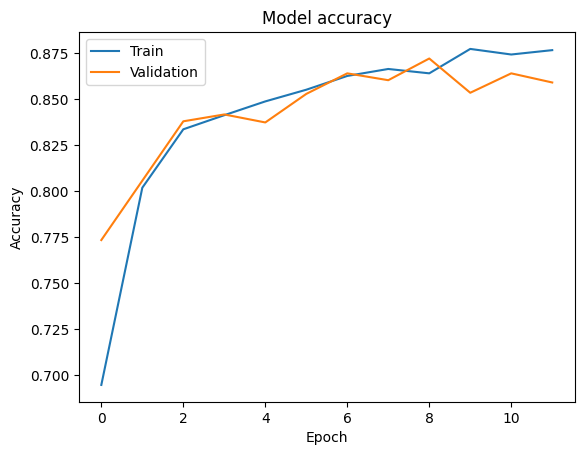

In [51]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# 